# Ejercicio 5: Gym

En el resto del curso trabajaremos con problemas disponibles en el framework Gym:

https://gym.openai.com

Este framework implementa muchos problemas de aprendizaje por refuerzo, desde los sencillos basados en texto y con unas pocas docenas de estados (Gridworld, Taxi) a problemas de control continuo (Cartpole, Pendulum) hasta juegos de Atari (Breakout, Space Invaders) y simuladores de robots (Mujoco):


Lamentablemente, el framework gym ya no es mantenido por OpenAI desde Septiembre 2022. Vamos a usar la librería gymnasium mantenida por la fundacion Farama, quienes han mantenido la librería desde entonces.

https://gymnasium.farama.org/



Para este ejercicio y el siguiente, vamos a ocupar entornos simples que se puedan instalar directamente en colab: toy text, classic control y box2d. Entornos mas complejos como los basados en juegos de Atari o el simulador físico Mujoco pueden ser explorados por usted de manera independiente ya que requieren dependencias adicionales.



In [ ]:
    !pip install -U gymnasium pygame moviepy
    !pip install gymnasium[box2d]

En colab, gym no puede abrir ventanas gráficas ya que corre desde su navegador. Hay una manera mas lenta de producir videos que se muestra a continuación.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

import gymnasium as gym
print("gym version:", gym.__version__)

from moviepy.editor import ImageSequenceClip, ipython_display

class GymRecorder(object):
    """
    Simple wrapper over moviepy to generate a .gif with the frames of a gym environment.

    The environment must have the render_mode `rgb_array_list`.
    """
    def __init__(self, env):
        self.env = env
        self._frames = []

    def record(self, frames):
        "To be called at the end of an episode."
        for frame in frames:
            self._frames.append(np.array(frame))

    def make_video(self, filename):
        "Generates the gif video."
        directory = os.path.dirname(os.path.abspath(filename))
        if not os.path.exists(directory):
            os.mkdir(directory)
        self.clip = ImageSequenceClip(list(self._frames), fps=self.env.metadata["render_fps"])
        self.clip.write_gif(filename, fps=self.env.metadata["render_fps"])
        del self._frames
        self._frames = []

gym version: 0.29.1


Un ambiente gym se puede crear usando:

env = gym.make('CartPole-v1', render_mode="human")

'CartPole-v1' puede ser reemplazado por el ambiente que desea crear. El codigo que se presenta a continuación imprime los nombres de todos los ambientes disponibles.

In [3]:
for env in gym.envs.registry.items():
    print(env[0])

CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
phys2d/CartPole-v0
phys2d/CartPole-v1
phys2d/Pendulum-v0
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v2
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
tabular/Blackjack-v0
tabular/CliffWalking-v0
Reacher-v2
Reacher-v4
Pusher-v2
Pusher-v4
InvertedPendulum-v2
InvertedPendulum-v4
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
Hopper-v2
Hopper-v3
Hopper-v4
Swimmer-v2
Swimmer-v3
Swimmer-v4
Walker2d-v2
Walker2d-v3
Walker2d-v4
Ant-v2
Ant-v3
Ant-v4
Humanoid-v2
Humanoid-v3
Humanoid-v4
HumanoidStandup-v2
HumanoidStandup-v4
GymV21Environment-v0
GymV26Environment-v0


El parámetro render_mode define como sera visualizado el ambiente.

None (default): permite entrenar un algoritmo  sin perder recursos computacionales en su visualizacion.

rgb_array_list: permite obtener arreglos numpy correspondientes a cada frame. Util para generar videos.

ansi: representacion como string. Solo disponible para los ambientes “Toy text”.

human: ventana gráfica mostrando el ambiente directamente (no disponible en colab).

El principal beneficio de gym es que todos los entornos tienen una interfaz común, definida por la clase gym.Env. Solo hay que usar unos pocos métodos para interactuar con el ambiente:

state, info = env.reset() *reinicia el ambiente y retorna el estado inicial*

state, reward, terminal, truncated, info = env.step(action) *ejecuta la acción action y retorna el nuevo estado, la recompensa y dos variables boolean indicando si el estado es terminal o esta truncado (timeout) e información adicional que por ahora puede ser ignorada*

env.render() *muestra el estado actual del proceso de Markov.*

Con esta interfaz se puede interactuar con el entorno de una manera estándar:

1. crear el ambiente.

2. Por un número fijo de episodios:

    2.1 Escoger un estado inicial con reset().

    2.2 Hasta que termine el episodio:

       Seleccionar una acción usando su algoritmo de RL.

       Ejecutar la acción (step()), observar los resultados

       Pasar al nuevo estado.

En colab solo puede crear un entorno con la opcion rgb_array_list.
Puede luego crear un GymRecorder (definido previamente):

recorder = GymRecorder(env)

Al final de cada episodio le puede ordenar al "GymRecorder" que genera todos los cuadros necesarios para crear un video. Los cuadros retornados por env.render() son arreglos numpy que son acumulador por el ambiente durante el episodio y borrados cuando env.reset() es utilizado.

recorder.record(env.render())

Luego puede generar un gif al final de la simulacion con:

recorder.make_video('videos/CartPole-v1.gif')

Finalmente, puede ver el gif en el notebook usando:

ipython_display('videos/CartPole-v1.gif')

In [ ]:
env = gym.make('CartPole-v1', render_mode="rgb_array_list")
recorder = GymRecorder(env)

for episode in range(10):
    state, info = env.reset()

    done = False
    while not done:
        # Escoger una acción aleatoria
        action = env.action_space.sample()

        # Obtener la transicion
        next_state, reward, terminal, truncated, info = env.step(action)

        # Mover al siguiente estado
        state = next_state

        # Fin del episodio
        done = terminal or truncated

    # Almacenar al final del episodio
    recorder.record(env.render())

recorder.make_video('videos/CartPole-v1.gif')
ipython_display('videos/CartPole-v1.gif', autoplay=1, loop=1)

Cada entorno define su espacio de estados (env.observation_space) y acciones (env.action_space).

Los estados de espacios y acciones pueden ser:

discretos (gym.spaces.Discrete(nb_states)), donde los estados son representados como un número entero entre 0 y nb_states-1.

feature-based (gym.spaces.Box(low=0, high=255, shape=(SCREEN_HEIGHT, SCREEN_WIDTH, 3))) donde los estados estan definidos por pixeles (frames).

continuous como la articulación de un robot con un angulo entre -180 and 180 degrees: gym.spaces.Box(-180.0, 180.0, (2, ))

Se puede obtener una muestra aleatoria de estado o acción de estos espacios:





In [5]:
action_space = gym.spaces.Box(-180.0, 180.0, (2, ))
action = action_space.sample()
print(action)

[-39.03192 137.28711]


**Pregunta 1:** Creear un metodo random_interaction(env, number_episodes, recorder=None) con los siguientes argumentos:

El entorno.
La cantidad de episodios a ejecutar.
Un GymRecorder (opcional) para almacenar los cuadros del ambiente si es que no es None.
El metodo debe retornal una lista de retorno sin descuento ($\gamma=1$, la suma de las recompensas obtenidas en el episodio) por cada episodio.

In [ ]:
def random_interaction(env, number_episodes, recorder=None):

    returns = []

    # Sample episodes
    for episode in range(number_episodes):

        # Sample the initial state
        state, info = env.reset()

        return_episode = 0.0
        done = False
        while not done:

            # Seleccione una accion aleatorio
            action = env.action_space.sample()

            # Genere una transicion
            next_state, reward, terminal, truncated, info = env.step(action)

            # Actualize el retorno
            return_episode = reward

            # Ir al siguiente estado
            state = next_state

            # End of the episode
            done = terminal or truncated

        # Record at the end of the episode
        if recorder is not None:
            recorder.record(env.render())

        returns.append(return_episode)

    return returns

**Pregunta 2:** Use el metodo para visualizar algunos entornos por pocos episodios:


CartPole-v1

MountainCar-v0

Pendulum-v1

Acrobot-v1

LunarLander-v2

BipedalWalker-v3

CarRacing-v2

Blackjack-v1

FrozenLake-v1

CliffWalking-v0

Taxi-v3

Gráfique los resultados para comparar

MoviePy - Building file videos/3.gif with imageio.


[18.0, 18.0, 12.0, 9.0, 12.0, 44.0, 17.0, 44.0, 13.0, 21.0, 68.0, 22.0, 24.0, 19.0, 29.0, 12.0, 22.0, 15.0, 22.0, 28.0, 11.0, 17.0, 13.0, 9.0, 36.0, 21.0, 21.0, 31.0, 15.0, 41.0, 11.0, 17.0, 16.0, 12.0, 13.0, 13.0, 24.0, 49.0, 26.0, 18.0, 14.0, 31.0, 21.0, 25.0, 10.0, 16.0, 13.0, 13.0, 27.0, 22.0]



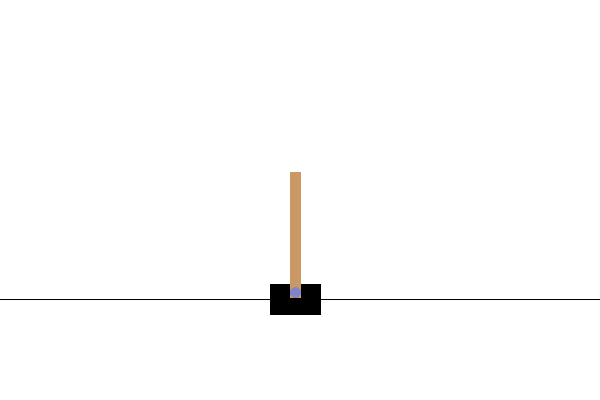

In [15]:
def random_interaction(env, number_episodes, recorder=None):

    returns = []

    # Sample episodes
    for episode in range(number_episodes):

        # Sample the initial state
        state, info = env.reset()

        return_episode = 0.0
        done = False
        while not done:

            # Seleccione una accion aleatorio
            action = env.action_space.sample()

            # Genere una transicion
            next_state, reward, terminal, truncated, info = env.step(action)

            # Actualize el retorno
            return_episode = return_episode + reward

            # Ir al siguiente estado
            state = next_state

            # End of the episode
            done = terminal or truncated

        # Record at the end of the episode
        if recorder is not None:
            recorder.record(env.render())

        returns.append(return_episode)

    recorder.make_video('videos/3.gif')

    return returns

env = gym.make('CartPole-v1',render_mode="rgb_array_list")
recorder = GymRecorder(env)
retorno = random_interaction(env,50,recorder)
print(retorno)
ipython_display('videos/3.gif', autoplay=1, loop=1)


Usted tambien puede crear sus propios entornos usando la interfaz:

https://gymnasium.farama.org/tutorials/environment_creation/

Aqui un ejemplo de un entorno completamente aleatorio:


In [ ]:
class RandomEnv(gym.Env):
    "Random discrete environment that does nothing."

    metadata = {"render_modes": ["ansi"], "render_fps": 1}

    def __init__(self, nb_states, nb_actions, max_episode_steps=10, render_mode="ansi"):

        self.nb_states = nb_states
        self.nb_actions = nb_actions
        self.max_episode_steps = max_episode_steps
        self.render_mode = render_mode

        # State space, can be discrete or continuous.
        self.observation_space = gym.spaces.Discrete(nb_states)

        # Action space, can be discrete or continuous.
        self.action_space = gym.spaces.Discrete(nb_actions)

        # Reset
        self.reset()


    def reset(self, seed=None, options=None):

        # Re-initialize time
        self.current_step = 0

        # Sample one state randomly
        self.state = self.observation_space.sample()

        return self.state, info

    def step(self, action):

        # Random transition to another state
        self.state = self.observation_space.sample()

        # Random reward
        reward = np.random.uniform(0, 1, 1)[0]

        # Terminate the episode after 10 steps
        terminal = False
        truncated = False

        self.current_step +=1
        if self.current_step % self.max_episode_steps == 0:
            truncated = True

        info = {} # No info

        return self.state, reward, terminal, truncated, info


    def render(self):
        if self.render_mode == "ansi":
            description = "Step " + str(self.current_step) + ": state " + str(self.state)
            return description
        return None


metadata define cuales modos estan disponibles en este entorno (aqui solo "ansi")

El constructor acepta el tamaño del espacio de estadios y acciones, la duración del episodio y el modo.

reset() genera un estado inicial aleatorio.

step() ignora la acción y genera una muestra para el nuevo estado y recompensa. Trunca un episodio después de max_episode_steps.

render() retorna un string con el estado actual.

**Pregunta 3** Interactúe con este entorno aleatorio por algunos episodios.

Como el modo es ansi tendrá que imprimir el string retornado por render después de cada paso.

In [ ]:
# Create the environment
env = RandomEnv(nb_states=10, nb_actions=4)

# Sample episodes
for episode in range(2):

    print("Episode", episode)

    # Aqui genere el estado inicial
    state, info = env.reset()

    # Muestre el estado inicial
    print(env.render())

    # Episode
    return_episode = 0.0
    done = False
    while not done:
        # Seleccionar una accion aleatoria
        action = env.action_space.sample()

        # Genere una transicion
        next_state, reward, terminal, truncated, info = env.step()

        # Vaya al siguiente estado
        state = next_state

        # Ajuste el retorno
        return_episode = 

        # Render the current state
        print(env.render())

        # End of the episode
        done = terminal or truncated

    print("Return of the episode:", return_episode)
    print('-'*10)

**Pregunta 4:** Crear un entorno para el robot reciclador usado en el ejercicio anterior.

Los parámetros alpha, beta, r_esperar and r_buscar deben ser pasados al constructor el entorno y guardados como atributos.

El espacio de estados es discreto con dos estados "alto" y "bajo" (índices 0 y 1). Las tres acciones son buscar, esperar y recargar con índices 0, 1, and 2.

El estado inicial (reset()) es siempre el estado "alto".

step() debe generar transiciones de acuerdo a las dinámicas del proceso de Markov. Para las acciones buscar y esperar, obtenga una muestra de recompensa de una distribución normal con media r_buscar (o r_esperar) y varianza 0.5.

Si el agente selecciona recargar en "alto", no haga nada (siguiente estado es "alto" y recompensa es 0).

Limite el número de pasos a 10, tal como en el entorno aleatorio anterior.

Interactue de manera aleatoria con el proceso por varios episodios y observe los retornos.

In [ ]:
#Ingrese su codigo aqui